<a href="https://colab.research.google.com/github/HagiwaraNorito/DeepLearning2022Late/blob/main/CNN%2Btrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CNN（畳み込みを含むニューラルネットワーク）でモデルに学習させる（＝訓練）

##学習モデルのライブラ地をimport


In [1]:
from keras.models import Sequential,Model
from keras.layers import Conv2D
from keras.layers import Flatten #全結合層用のクラス
from keras.layers import Dense #（分類出力用の）普通のニューロン層
import keras 

##SVG画像表示用のライブラリをimport

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

##ほかのライブラリをimport


In [3]:
import numpy as np 
#早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks

##Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [4]:
x_train=np.random.random((100,6,6,1))
y_train=keras.utils.to_categorical(np.random.randint(10,size=(100,1)),num_classes=10)

In [5]:
x_test=np.random.random((20,6,6,1))
y_test=keras.utils.to_categorical(np.random.randint(10,size=(20,1)),num_classes=10)

In [6]:
model=Sequential()

In [7]:
model.add(Conv2D(

    filters=3,#フィルター3パターン

    kernel_size=(3,3),#受容野のサイズ縦3,横3

    kernel_initializer='lecun_uniform',

    input_shape=(6,6,1),#入力データの形縦6,横6

    name='Conv2D_1'))

In [8]:
model.add(Flatten(name='Flatten_1'))
model.add(Dense(units=10,activation='softmax',name='Dense_1'))

##組み立てた学習モデルの構成を、SVG画像として表示

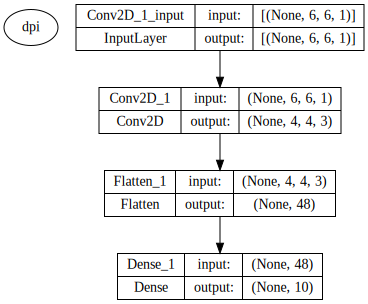

In [9]:
SVG(model_to_dot(model,
                 show_shapes=True,
                 dpi=None).create(prog='dot',format='svg'))

In [10]:
earlyStopping=callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5)

##学習方法を指定して学習モデルをコンパイルする

In [11]:
model.compile(loss='mean_squared_error',
              optimizer='sgd'
             )

In [12]:
model.fit(x_train,y_train,
          batch_size=32,
          epochs=10,
          callbacks=[earlyStopping],
          validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 201ms/step - loss: 0.0932 - val_loss: 0.0983
Epoch 2/10
3/3 [==============================] - 0s 27ms/step - loss: 0.0932 - val_loss: 0.0983
Epoch 3/10
3/3 [==============================] - 0s 44ms/step - loss: 0.0932 - val_loss: 0.0983
Epoch 4/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0932 - val_loss: 0.0983
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 0.0932 - val_loss: 0.0982
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: 0.0932 - val_loss: 0.0982
Epoch 7/10
3/3 [==============================] - 0s 35ms/step - loss: 0.0932 - val_loss: 0.0982
Epoch 8/10
3/3 [==============================] - 0s 33ms/step - loss: 0.0932 - val_loss: 0.0982
Epoch 9/10
3/3 [==============================] - 0s 24ms/step - loss: 0.0931 - val_loss: 0.0981
Epoch 10/10
3/3 [==============================] - 0s 36ms/step - loss: 0.0931 - val_loss: 0.0981
